In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
housing=pd.read_csv("./Housing.csv")

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing.shape

(545, 13)

In [8]:
housing.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
price               545 non-null int64
area                545 non-null int64
bedrooms            545 non-null int64
bathrooms           545 non-null int64
stories             545 non-null int64
mainroad            545 non-null object
guestroom           545 non-null object
basement            545 non-null object
hotwaterheating     545 non-null object
airconditioning     545 non-null object
parking             545 non-null int64
prefarea            545 non-null object
furnishingstatus    545 non-null object
dtypes: int64(6), object(7)
memory usage: 251.7 KB


In [9]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [26]:
housing.all()

price                True
area                 True
bedrooms             True
bathrooms            True
stories              True
mainroad             True
guestroom            True
basement             True
hotwaterheating      True
airconditioning      True
parking             False
prefarea             True
furnishingstatus     True
dtype: bool

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

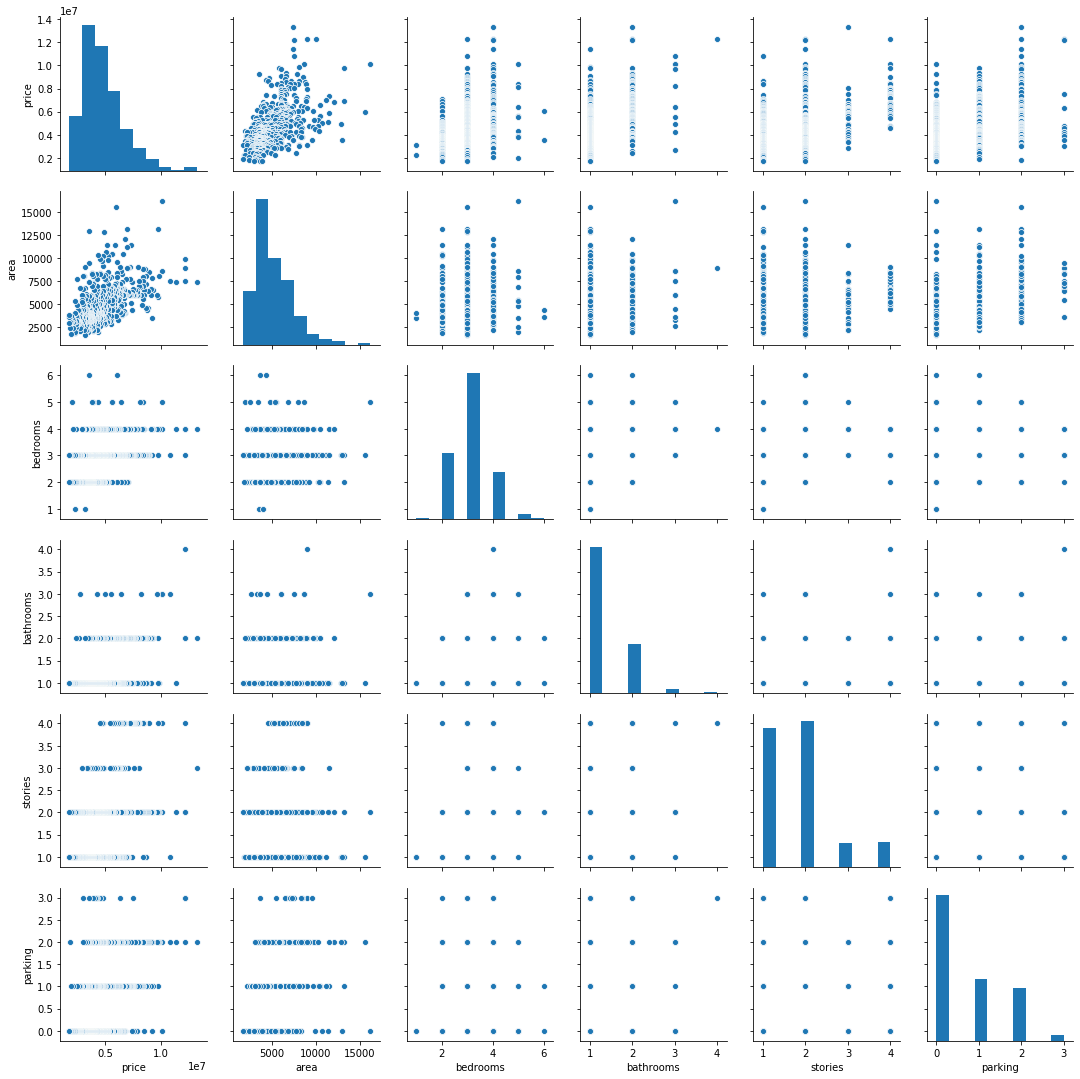

In [11]:
sns.pairplot(housing)
plt.show()

In [12]:
#visualizing categorical variable

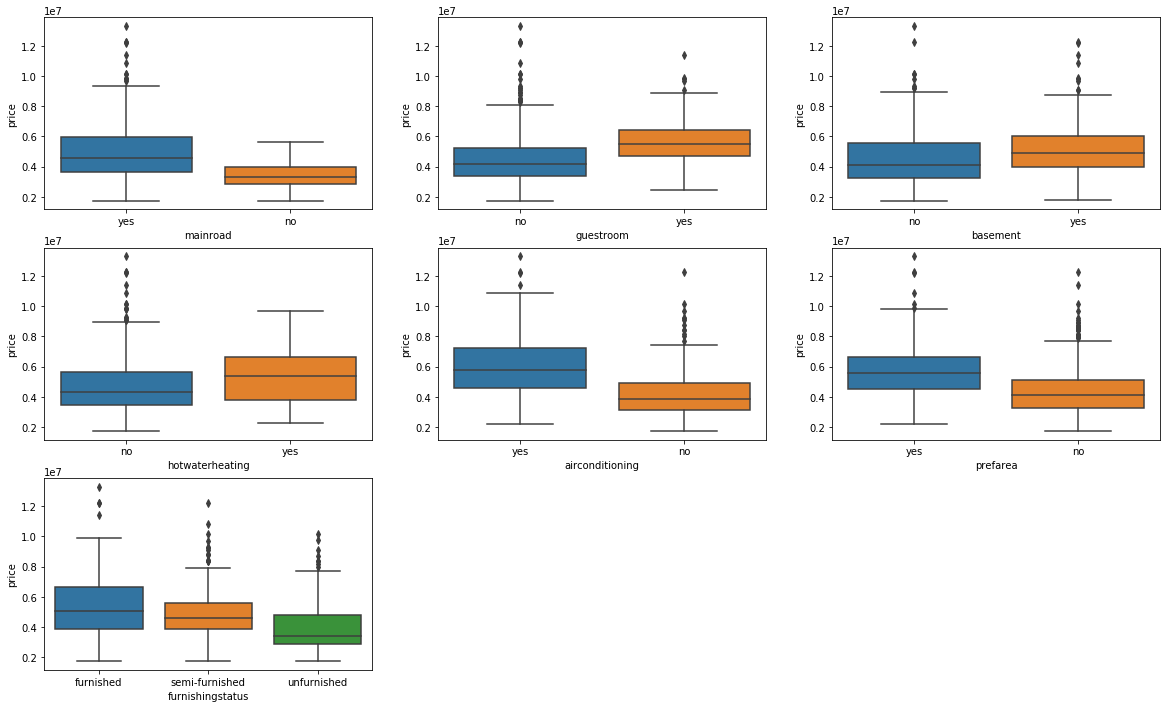

In [16]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x='mainroad',y='price',data=housing)
plt.subplot(3,3,2)
sns.boxplot(x='guestroom',y='price',data=housing)
plt.subplot(3,3,3)
sns.boxplot(x='basement',y='price',data=housing)
plt.subplot(3,3,4)
sns.boxplot(x='hotwaterheating',y='price',data=housing)
plt.subplot(3,3,5)
sns.boxplot(x='airconditioning',y='price',data=housing)
plt.subplot(3,3,6)
sns.boxplot(x='prefarea',y='price',data=housing)
plt.subplot(3,3,7)
sns.boxplot(x='furnishingstatus',y='price',data=housing)

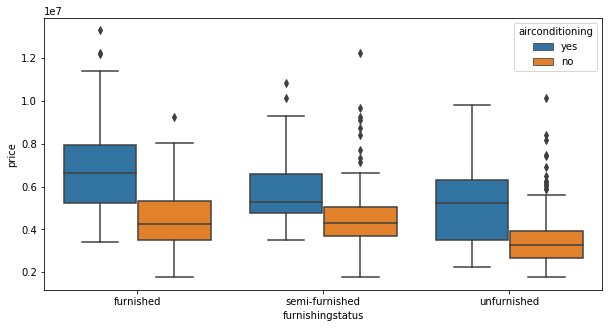

In [17]:
#using hue
plt.figure(figsize=(10,5))
sns.boxplot(x='furnishingstatus',y='price',hue='airconditioning',data=housing)
plt.show()

In [18]:
#convert categorical variables into numerical variables

In [28]:
varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
#defining the map function
def binary_map(x):
    return x.map({'yes':1,'no':0})
#applying the function
housing[varlist]=housing[varlist].apply(binary_map)

In [29]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [30]:
#furninshing have 3 levels, so use dummy variable for this
status=pd.get_dummies(housing['furnishingstatus'])

In [31]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [32]:
#concatinating
housing=pd.concat([housing,status],axis=1)

In [33]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,1,0,0


In [34]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [35]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0


In [36]:
#splitting data into training & testing sets

In [38]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(housing,train_size=0.7,test_size=0.3,random_state=100)

In [39]:
#rescaling features

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
scaler=MinMaxScaler()

In [44]:
num_vars=['price','area','bedrooms','bathrooms','stories','parking']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [45]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0,1


In [46]:
df_train.reset_index(inplace=True)

In [47]:
df_train.head()

,index,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0,1
1,19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1,0
2,159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0,0
3,35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0,0
4,28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0,1


In [48]:
df_train.drop('index',axis=1,inplace=True)

In [49]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,0,1
1,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1,0
2,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,1,0,0
3,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0,0
4,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,0,1


In [50]:
df_train.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
price,1.000000,0.532025,0.349825,0.524246,0.409464,0.319208,0.265877,0.200743,0.141202,0.433162,0.352081,0.344543,0.199934,0.078917,-0.270114
area,0.532025,1.000000,0.097462,0.163446,0.069274,0.308272,0.155665,0.106971,0.037719,0.215888,0.365658,0.279878,0.186304,-0.040753,-0.131524
bedrooms,0.349825,0.097462,1.000000,0.346925,0.419582,0.012655,0.089488,0.120618,0.085818,0.161890,0.120363,0.076503,0.079363,0.049111,-0.125921
bathrooms,0.524246,0.163446,0.346925,1.000000,0.295689,0.031716,0.150982,0.120857,0.112732,0.228315,0.138241,0.061584,0.062830,0.065987,-0.128192
stories,0.409464,0.069274,0.419582,0.295689,1.000000,0.129427,0.068088,-0.155313,-0.001538,0.279779,0.009708,0.072192,0.096347,-0.001883,-0.088199
mainroad,0.319208,0.308272,0.012655,0.031716,0.129427,1.000000,0.106875,0.067937,-0.003779,0.056375,0.200389,0.191465,0.124165,0.012254,-0.129101
guestroom,0.265877,0.155665,0.089488,0.150982,0.068088,0.106875,1.000000,0.367345,0.018394,0.130300,-0.010240,0.161877,0.017664,0.000632,-0.017198
basement,0.200743,0.106971,0.120618,0.120857,-0.155313,0.067937,0.367345,1.000000,0.023806,0.082892,0.042203,0.203933,0.027337,0.049430,-0.077562
hotwaterheating,0.141202,0.037719,0.085818,0.112732,-0.001538,-0.003779,0.018394,0.023806,1.000000,-0.153801,0.074999,-0.074318,-0.005283,0.064641,-0.063025
airconditioning,0.433162,0.215888,0.161890,0.228315,0.279779,0.056375,0.130300,0.082892,-0.153801,1.000000,0.188132,0.099840,0.161780,-0.026475,-0.123584


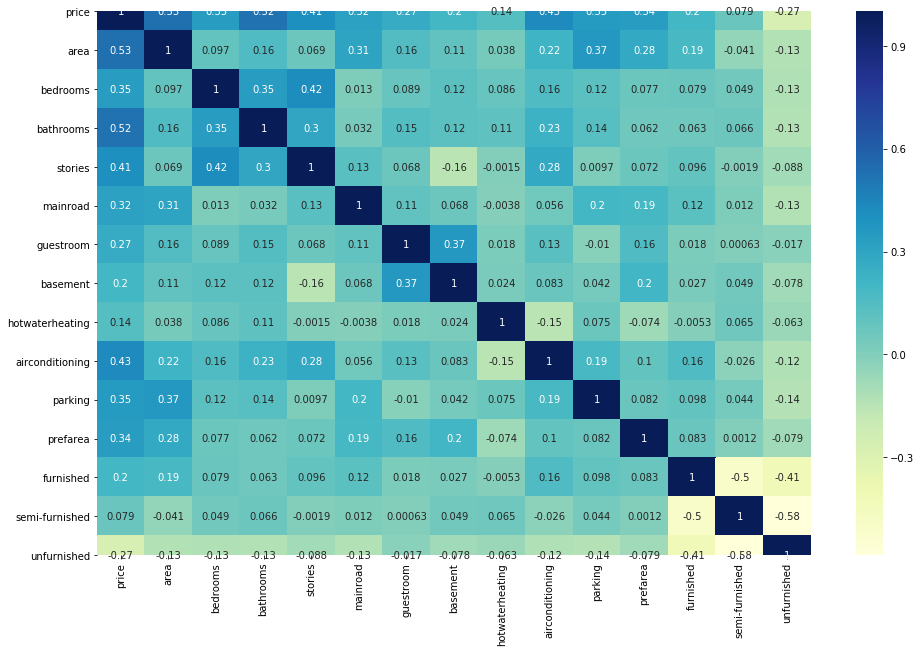

In [52]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [54]:
#area is the most correlated to the price

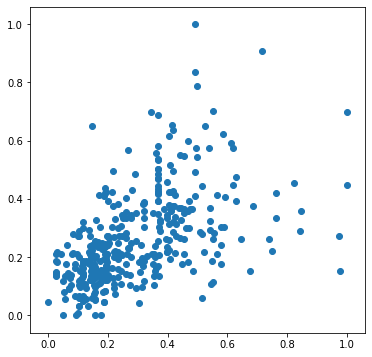

In [55]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.area,df_train.price)
plt.show()

In [57]:
#will pick area as the first variable & we'll try to fit a regression line to that

In [58]:
#divide x&y sets for model building

In [59]:
y_train=df_train.pop('price')
x_train=df_train

In [60]:
df_train.index

RangeIndex(start=0, stop=381, step=1)

In [61]:
#building linear model
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train[['area']])

In [62]:
#create first fitted model
lr=sm.OLS(y_train,x_train_lm).fit()

In [63]:
lr.params

const    0.126894
area     0.462192
dtype: float64

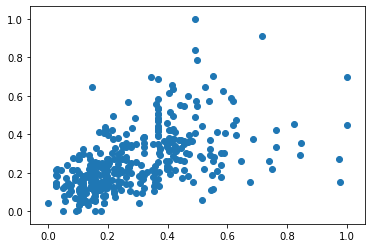

In [64]:
#let's visualize the data with a scatter plot & the fitted regression line
plt.scatter(x_train_lm.iloc[:,1],y_train)
plt.show()

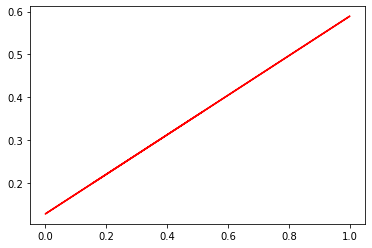

In [65]:
plt.plot(x_train_lm.iloc[:,1],0.127+0.462*x_train_lm.iloc[:,1],'r')
plt.show()

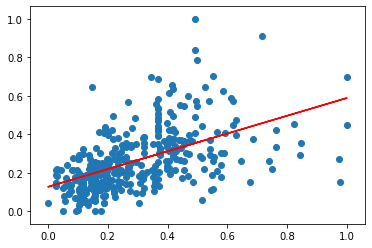

In [66]:
plt.scatter(x_train_lm.iloc[:,1],y_train)
plt.plot(x_train_lm.iloc[:,1],0.127+0.462*x_train_lm.iloc[:,1],'r')
plt.show()

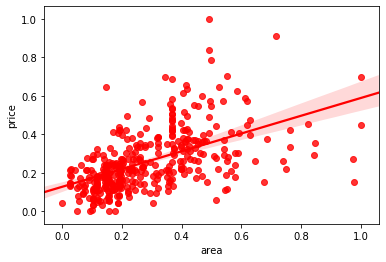

In [77]:
sns.regplot(x=x_train_lm.iloc[:,1],y=y_train,data=df_train,color='r')

In [78]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.15e-29
Time:                        16:33:21   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.0

In [79]:
#R2 value is very low, we can add more variables, the 2nd most highly correlated variable

In [80]:
x_train_lm=x_train[['area','bathrooms']]

In [82]:
import statsmodels.api as sm
x_train_lm=sm.add_constant(x_train_lm)

In [84]:
lr=sm.OLS(y_train,x_train_lm).fit()
lr.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [85]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.51e-54
Time:                        16:39:44   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.0

In [86]:
#let's add more variables

In [87]:
x_train_lm=x_train[['area','bathrooms','bedrooms']]

In [94]:
x_train_lm=sm.add_constant(x_train_lm)
lr=sm.OLS(y_train,x_train_lm).fit()
lr.params

const              0.007503
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
furnished          0.012529
semi-furnished     0.013450
unfurnished       -0.018476
dtype: float64

In [89]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           3.12e-57
Time:                        16:43:02   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.0

In [90]:
#will add all features

In [95]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [98]:
x_train_lm=sm.add_constant(x_train)
lr_1=sm.OLS(y_train,x_train_lm).fit()
lr.params

const              0.007503
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
furnished          0.012529
semi-furnished     0.013450
unfurnished       -0.018476
dtype: float64

In [99]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           8.83e-83
Time:                        16:50:58   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0075      0.014     

In [100]:
#check VIF values of the feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
12,semi-furnished,7.05
11,furnished,5.32
13,unfurnished,5.04
3,stories,1.48
0,area,1.38
1,bedrooms,1.37
6,basement,1.31
2,bathrooms,1.26
8,airconditioning,1.25
9,parking,1.24


In [101]:
#we generally want a VIF  that is leass than 5
#dropping variables & updating the model

In [102]:
x=x_train.drop('semi-furnished',1,)

In [104]:
#build next fitted model
x_train_lm=sm.add_constant(x)
lr2=sm.OLS(y_train,x_train_lm).fit()

In [105]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           8.83e-83
Time:                        17:20:29   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0210      0.019     

In [108]:
#calculating VIF again for the new model
x.shape

(381, 13)

In [109]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,bedrooms,6.69
4,mainroad,5.78
0,area,4.76
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.78
2,bathrooms,1.67
11,furnished,1.65
12,unfurnished,1.61


In [110]:
x=x.drop('bedrooms',1)

In [111]:
x_train_lm=sm.add_constant(x)
lr3=sm.OLS(y_train,x_train_lm).fit()

In [112]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.35e-83
Time:                        17:27:07   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0359      0.015     

In [115]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,mainroad,4.99
0,area,4.66
2,stories,2.24
8,parking,2.10
5,basement,1.87
7,airconditioning,1.78
10,furnished,1.63
1,bathrooms,1.61
11,unfurnished,1.51
9,prefarea,1.50


In [116]:
#furnished has high p-value, so we have to drop it

In [117]:
x=x.drop('furnished',1)

In [119]:
x_train_lm=sm.add_constant(x)
lr4=sm.OLS(y_train,x_train_lm).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           2.73e-84
Time:                        17:36:06   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015     

In [120]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


In [122]:
#now VIF & P-value both are in acceptable range,
#so we go ahead & make our predictions using this model only

In [123]:
#residual analysis of train data

In [124]:
y_train_price=lr4.predict(x_train_lm)

In [125]:
print(y_train_price)

0      0.109599
1      0.463835
2      0.330450
3      0.515631
4      0.468225
         ...   
376    0.079966
377    0.477416
378    0.263852
379    0.443907
380    0.173336
Length: 381, dtype: float64


Text(0.5, 0, 'Errors')

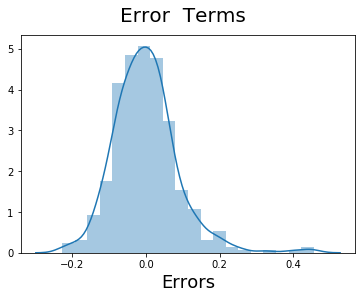

In [126]:
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle("Error  Terms",fontsize=20)
plt.xlabel('Errors',fontsize=18)

In [129]:
#now we have a fitted model & checked the normality of error terms
#lets make predictions using lr models

In [130]:
print(x.columns)

Index(['area', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'unfurnished'],
      dtype='object')


In [131]:
#applying scaling on test set
num_vars=['price','area','bedrooms','bathrooms','stories','parking']
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [132]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.250000,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.434339,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,0.250000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [133]:
#dividing into x_test&ytest
y_test=df_test.pop('price')
x_test=df_test

In [134]:
x_test_m4=sm.add_constant(x_test)

In [135]:
x_test_m4=x_test_m4.drop(["bedrooms","semi-furnished",'furnished'],axis=1)

In [136]:
y_pred_m4=lr4.predict(x_test_m4)

In [137]:
print(y_pred_m4)

265    0.204980
54     0.425613
171    0.339321
244    0.309397
268    0.254629
         ...   
413    0.275609
191    0.360889
310    0.194143
46     0.474017
50     0.464556
Length: 164, dtype: float64


In [138]:
#model evaluation

Text(0, 0.5, 'y_pred')

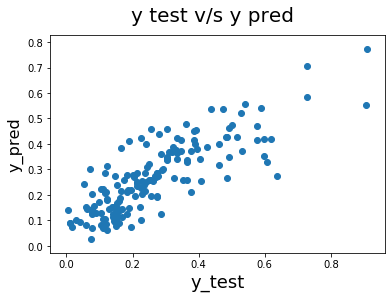

In [139]:
fig=plt.figure()
plt.scatter(y_test,y_pred_m4)
fig.suptitle("y test v/s y pred",fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred',fontsize=16)

price=0.2347*area+0.1965*bathrooms+0.1178*stories+0.0488*mainroad+0.0301*guestroom+0.0239*basement+0.0864*hotwaterheating+0.0665*airconditioning+0.0629*parking+0.0596*prefarea-0.0323*unfurnished

In [141]:
from sklearn.model_selection import cross_val_score#used to do cross validation
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
#mean squared error
mse=cross_val_score(lin_regressor,x_train_lm,y_train,scoring='neg_mean_squared_error',cv=5)#5 cross validation means 5 experiments
mean_mse=np.mean(mse)
print(mean_mse)#this value should be near to zero, more near to zero more accurate

-0.008530608860397835


In [143]:
from sklearn.model_selection import cross_val_score#used to do cross validation
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
#mean squared error
score=cross_val_score(lin_regressor,x_train_lm,y_train,cv=5)#5 cross validation means 5 experiments
mean_r2=np.mean(score)
print(mean_r2)#this value should be near to zero, more near to zero more accurate

0.6571486836970593
